In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st

# A) Diabetes Data

## 1) Loading Dataset using Sklearn and transforming it into DataFrame

In [2]:
diabetes= datasets.load_diabetes()
df_dia= pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_dia['Target'] = pd.Series(diabetes.target)
df_dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
# Reading the Description of the Dataset
des=diabetes.DESCR
des.split("\n")

['.. _diabetes_dataset:',
 '',
 'Diabetes dataset',
 '----------------',
 '',
 'Ten baseline variables, age, sex, body mass index, average blood',
 'pressure, and six blood serum measurements were obtained for each of n =',
 '442 diabetes patients, as well as the response of interest, a',
 'quantitative measure of disease progression one year after baseline.',
 '',
 '**Data Set Characteristics:**',
 '',
 '  :Number of Instances: 442',
 '',
 '  :Number of Attributes: First 10 columns are numeric predictive values',
 '',
 '  :Target: Column 11 is a quantitative measure of disease progression one year after baseline',
 '',
 '  :Attribute Information:',
 '      - Age',
 '      - Sex',
 '      - Body mass index',
 '      - Average blood pressure',
 '      - S1',
 '      - S2',
 '      - S3',
 '      - S4',
 '      - S5',
 '      - S6',
 '',
 'Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of ea

## 2) Data Description

### i) Shape of Data

In [4]:
df_dia.shape

(442, 11)

### ii) Top 20 Rows

In [5]:
df_dia.head(20)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


### iii) Data Types of all the Features

In [6]:
df_dia.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
Target    float64
dtype: object

### iv) MCT and Dispersion Properties

In [7]:
# Mean
df_dia.mean()

age      -3.634285e-16
sex       1.308343e-16
bmi      -8.045349e-16
bp        1.281655e-16
s1       -8.835316e-17
s2        1.327024e-16
s3       -4.574646e-16
s4        3.777301e-16
s5       -3.830854e-16
s6       -3.412882e-16
Target    1.521335e+02
dtype: float64

In [8]:
# Median
df_dia.median()

age         0.005383
sex        -0.044642
bmi        -0.007284
bp         -0.005671
s1         -0.004321
s2         -0.003819
s3         -0.006584
s4         -0.002592
s5         -0.001948
s6         -0.001078
Target    140.500000
dtype: float64

In [9]:
# Mode
df_dia.mode()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.016281,-0.044642,-0.030996,-0.040099,-0.037344,-0.001001,-0.013948,-0.039493,-0.018118,0.003064,72.0
1,NaN,NaN,-0.024529,-0.005671,-0.007073,0.016222,NaN,NaN,NaN,NaN,200.0


In [10]:
# Variance
for i in df_dia.columns:
    print("Variance of", i ,st.variance(df_dia[i]))

Variance of age 0.0022675736961452935
Variance of sex 0.002267573696145126
Variance of bmi 0.002267573696145552
Variance of bp 0.0022675736961451655
Variance of s1 0.0022675736961451512
Variance of s2 0.002267573696145091
Variance of s3 0.0022675736961452805
Variance of s4 0.0022675736961450094
Variance of s5 0.0022675736961454166
Variance of s6 0.002267573696145403
Variance of Target 5943.331347923785


In [11]:
df_dia.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### v) Number of Null Values

In [12]:
df_dia.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64

## 3) Pre-Processing

### i) Round All the Values to 3 Decimal Places

In [13]:
df_dia=round(df_dia,3)
df_dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.0
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.0
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.0
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.0
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047,135.0


### ii) Z-Score Normalization

In [14]:
## Normalizing Data by using Z score
df_col=df_dia[:]  # Copy of df_dia
del df_col["Target"]
z_score=stats.zscore(df_col)
z_score

array([[ 0.79870226,  1.06548848,  1.30316264, ..., -0.06336251,
         0.42039589, -0.37811974],
       [-0.04198691, -0.93853666, -1.07238979, ..., -0.82371264,
        -1.43123118, -1.93496016],
       [ 1.78651203,  1.06548848,  0.92475605, ..., -0.06336251,
         0.06269521, -0.54642681],
       ...,
       [ 0.88277118,  1.06548848, -0.33659922, ..., -0.23232921,
        -0.98936563,  0.31614694],
       [-0.94572776, -0.93853666,  0.81964311, ...,  0.5702626 ,
         0.94642631, -0.54642681],
       [-0.94572776, -0.93853666, -1.53488673, ..., -0.82371264,
        -0.08459331,  0.06368633]])

## 4) Univariate/Brvariate Analysis

### i) Histogram of all the numeric columns

(array([19., 25., 34., 39., 37., 60., 73., 52., 51., 39.,  8.,  5.]),
 array([-0.107     , -0.08883333, -0.07066667, -0.0525    , -0.03433333,
        -0.01616667,  0.002     ,  0.02016667,  0.03833333,  0.0565    ,
         0.07466667,  0.09283333,  0.111     ]),
 <a list of 12 Patch objects>)

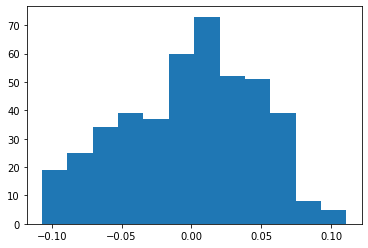

In [15]:
plt.hist(df_dia["age"],bins=12)

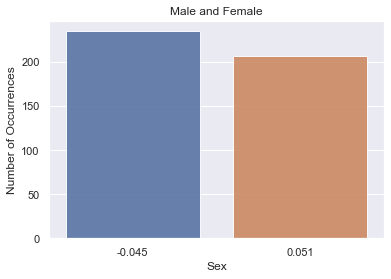

In [16]:
sex_count= df_dia['sex'].value_counts()
sns.set(style="darkgrid")
sns.barplot(sex_count.index,sex_count.values, alpha=0.9)
plt.title('Male and Female')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.show()

(array([21., 47., 87., 85., 62., 48., 47., 21., 14.,  6.,  2.,  2.]),
 array([-0.09   , -0.06825, -0.0465 , -0.02475, -0.003  ,  0.01875,
         0.0405 ,  0.06225,  0.084  ,  0.10575,  0.1275 ,  0.14925,
         0.171  ]),
 <a list of 12 Patch objects>)

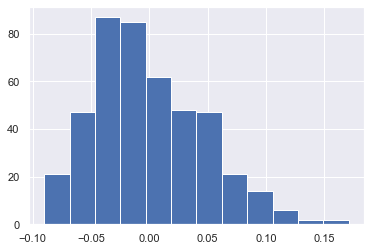

In [17]:
plt.hist(df_dia['bmi'], bins = 12)

(array([ 5., 30., 68., 90., 78., 59., 50., 39., 18.,  5.]),
 array([-0.112 , -0.0876, -0.0632, -0.0388, -0.0144,  0.01  ,  0.0344,
         0.0588,  0.0832,  0.1076,  0.132 ]),
 <a list of 10 Patch objects>)

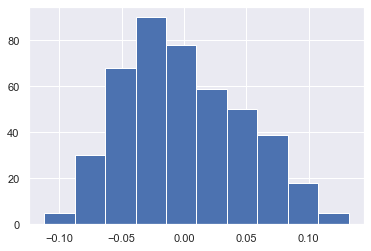

In [18]:
plt.hist(df_dia['bp'], bins = 10)

(array([ 3., 12., 32., 64., 80., 91., 65., 50., 22., 12.,  8.,  3.]),
 array([-0.127     , -0.10358333, -0.08016667, -0.05675   , -0.03333333,
        -0.00991667,  0.0135    ,  0.03691667,  0.06033333,  0.08375   ,
         0.10716667,  0.13058333,  0.154     ]),
 <a list of 12 Patch objects>)

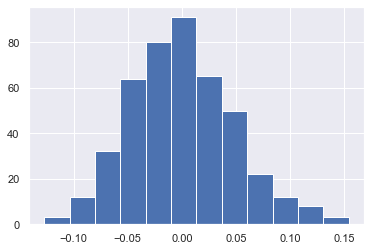

In [19]:
plt.hist(df_dia['s1'], bins = 12)

(array([ 11.,  25.,  50., 112.,  85.,  74.,  49.,  23.,   6.,   5.,   1.,
          1.]),
 array([-0.116  , -0.08975, -0.0635 , -0.03725, -0.011  ,  0.01525,
         0.0415 ,  0.06775,  0.094  ,  0.12025,  0.1465 ,  0.17275,
         0.199  ]),
 <a list of 12 Patch objects>)

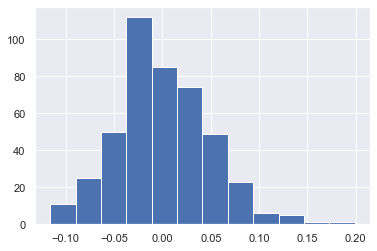

In [20]:
plt.hist(df_dia['s2'], bins = 12)

(array([ 5., 38., 83., 88., 76., 67., 45., 23.,  5.,  6.,  2.,  4.]),
 array([-0.102     , -0.07841667, -0.05483333, -0.03125   , -0.00766667,
         0.01591667,  0.0395    ,  0.06308333,  0.08666667,  0.11025   ,
         0.13383333,  0.15741667,  0.181     ]),
 <a list of 12 Patch objects>)

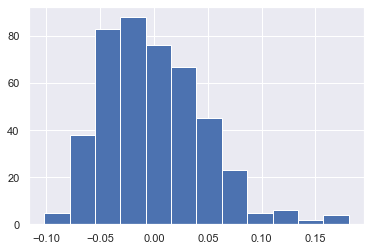

In [21]:
plt.hist(df_dia['s3'], bins = 12)

(array([ 30., 137.,   8., 119.,  13.,  75.,  36.,   5.,  13.,   2.,   3.,
          1.]),
 array([-0.076  , -0.05425, -0.0325 , -0.01075,  0.011  ,  0.03275,
         0.0545 ,  0.07625,  0.098  ,  0.11975,  0.1415 ,  0.16325,
         0.185  ]),
 <a list of 12 Patch objects>)

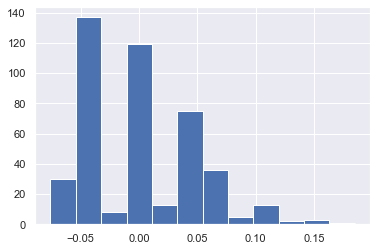

In [22]:
plt.hist(df_dia['s4'], bins = 12)

(array([ 30., 137.,   8., 119.,  13.,  75.,  36.,   5.,  13.,   2.,   3.,
          1.]),
 array([-0.076  , -0.05425, -0.0325 , -0.01075,  0.011  ,  0.03275,
         0.0545 ,  0.07625,  0.098  ,  0.11975,  0.1415 ,  0.16325,
         0.185  ]),
 <a list of 12 Patch objects>)

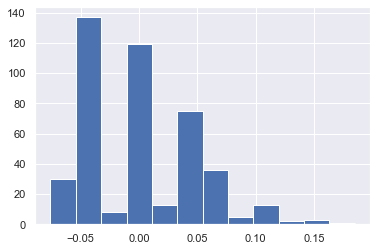

In [23]:
plt.hist(df_dia['s4'], bins = 12)

(array([ 1., 10., 28., 57., 83., 66., 65., 65., 31., 23.,  5.,  8.]),
 array([-0.126     , -0.10433333, -0.08266667, -0.061     , -0.03933333,
        -0.01766667,  0.004     ,  0.02566667,  0.04733333,  0.069     ,
         0.09066667,  0.11233333,  0.134     ]),
 <a list of 12 Patch objects>)

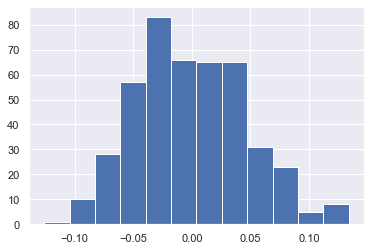

In [24]:
plt.hist(df_dia['s5'], bins = 12)

(array([  3.,   4.,  22.,  50.,  54.,  72., 108.,  64.,  25.,  25.,   7.,
          8.]),
 array([-0.138     , -0.11516667, -0.09233333, -0.0695    , -0.04666667,
        -0.02383333, -0.001     ,  0.02183333,  0.04466667,  0.0675    ,
         0.09033333,  0.11316667,  0.136     ]),
 <a list of 12 Patch objects>)

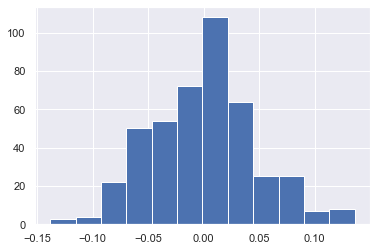

In [25]:
plt.hist(df_dia['s6'], bins = 12)

### ii) Box Plots of all the numeric columns

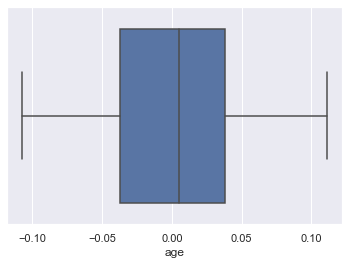

In [26]:
sns.boxplot(x = df_dia['age'])

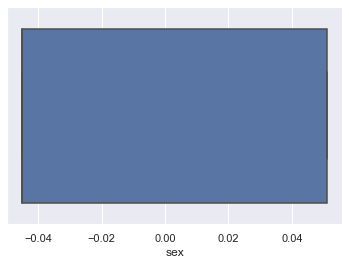

In [27]:
sns.boxplot(x = df_dia['sex'])

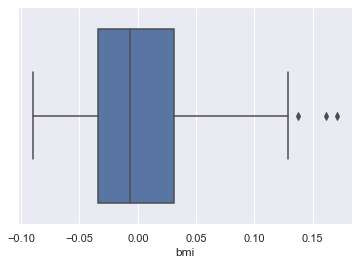

In [28]:
sns.boxplot(x = df_dia['bmi'])

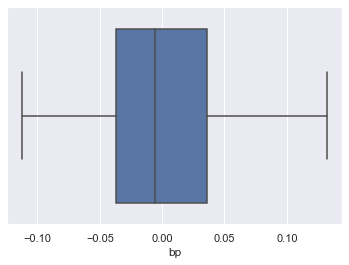

In [29]:
sns.boxplot(x = df_dia['bp'])

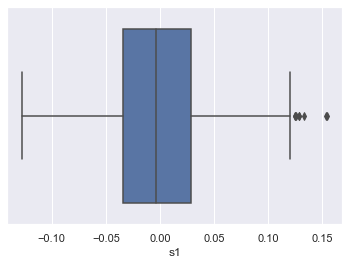

In [30]:
sns.boxplot(x = df_dia['s1'])

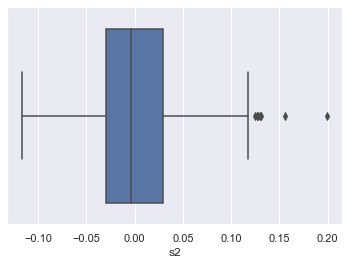

In [31]:
sns.boxplot(x = df_dia['s2'])

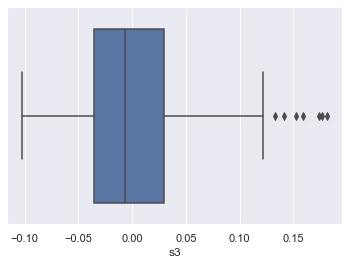

In [32]:
sns.boxplot(x = df_dia['s3'])

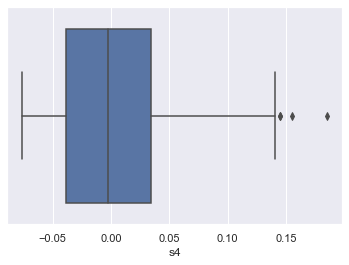

In [33]:
sns.boxplot(x = df_dia['s4'])

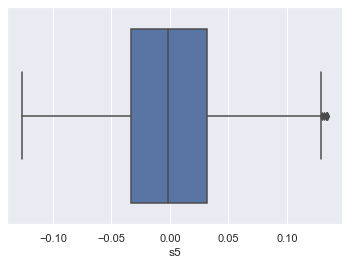

In [34]:
sns.boxplot(x = df_dia['s5'])

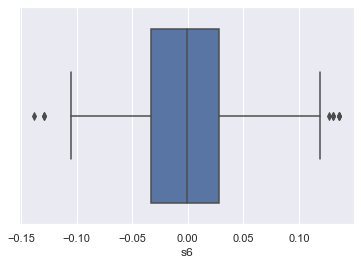

In [35]:
sns.boxplot(x = df_dia['s6'])

### iii) Scatter plots of all the variables with Target Variable

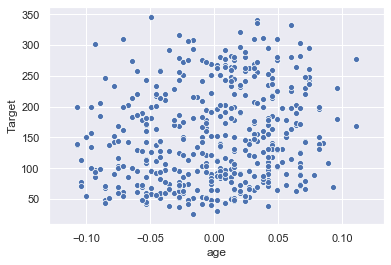

In [36]:
sns.scatterplot(x=df_dia['age'],y=df_dia['Target'])

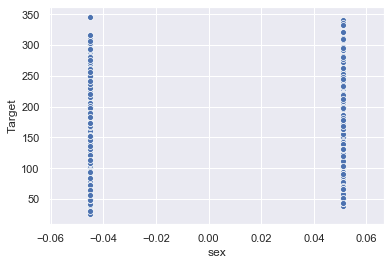

In [37]:
sns.scatterplot(x=df_dia['sex'],y=df_dia['Target'])

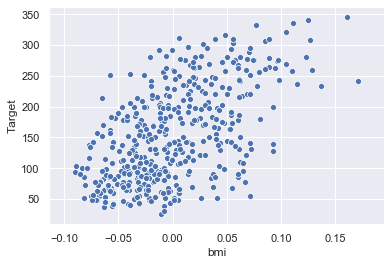

In [38]:
sns.scatterplot(x=df_dia['bmi'],y=df_dia['Target'])

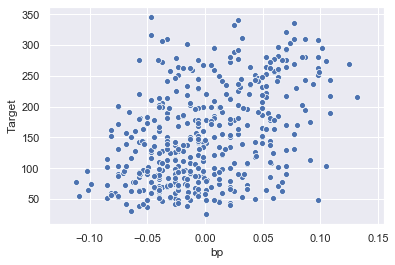

In [39]:
sns.scatterplot(x=df_dia['bp'],y=df_dia['Target'])

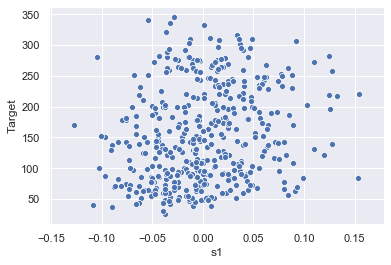

In [40]:
sns.scatterplot(x=df_dia['s1'],y=df_dia['Target'])

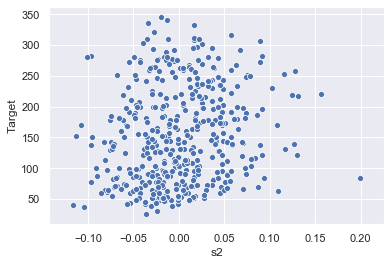

In [41]:
sns.scatterplot(x=df_dia['s2'],y=df_dia['Target'])

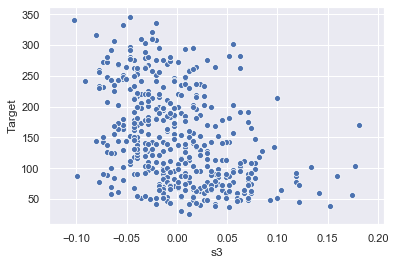

In [42]:
sns.scatterplot(x=df_dia['s3'],y=df_dia['Target'])

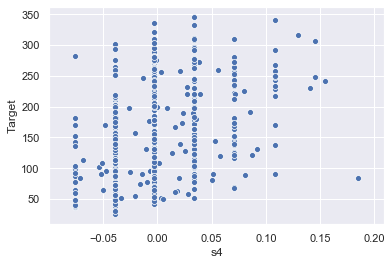

In [43]:
sns.scatterplot(x=df_dia['s4'],y=df_dia['Target'])

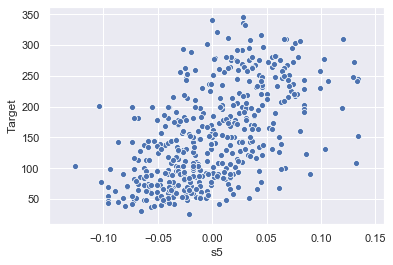

In [44]:
sns.scatterplot(x=df_dia['s5'],y=df_dia['Target'])

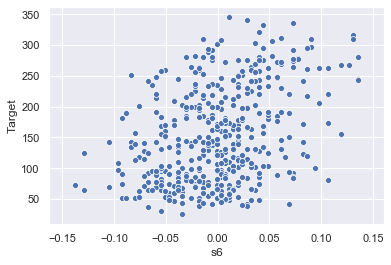

In [45]:
sns.scatterplot(x=df_dia['s6'],y=df_dia['Target'])

### iv) Pearson Correlation

In [46]:
corrmat=df_dia.corr()
corrmat

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173762,0.185196,0.335064,0.260009,0.219596,-0.075176,0.202716,0.270470,0.301545,0.187981
sex,0.173762,1.000000,0.087754,0.240758,0.035463,0.142204,-0.378980,0.331336,0.149759,0.208100,0.043062
bmi,0.185196,0.087754,1.000000,0.395527,0.249836,0.261252,-0.366175,0.412998,0.446365,0.389052,0.586526
bp,0.335064,0.240758,0.395527,1.000000,0.242849,0.185248,-0.178393,0.256320,0.392978,0.390144,0.441154
s1,0.260009,0.035463,0.249836,0.242849,1.000000,0.896518,0.051942,0.541880,0.515163,0.326108,0.211751
s2,0.219596,0.142204,0.261252,0.185248,0.896518,1.000000,-0.196652,0.659737,0.318150,0.291227,0.173972
s3,-0.075176,-0.378980,-0.366175,-0.178393,0.051942,-0.196652,1.000000,-0.737732,-0.398469,-0.273753,-0.394896
s4,0.202716,0.331336,0.412998,0.256320,0.541880,0.659737,-0.737732,1.000000,0.617218,0.417079,0.429463
s5,0.270470,0.149759,0.446365,0.392978,0.515163,0.318150,-0.398469,0.617218,1.000000,0.465186,0.565860
s6,0.301545,0.208100,0.389052,0.390144,0.326108,0.291227,-0.273753,0.417079,0.465186,1.000000,0.382662


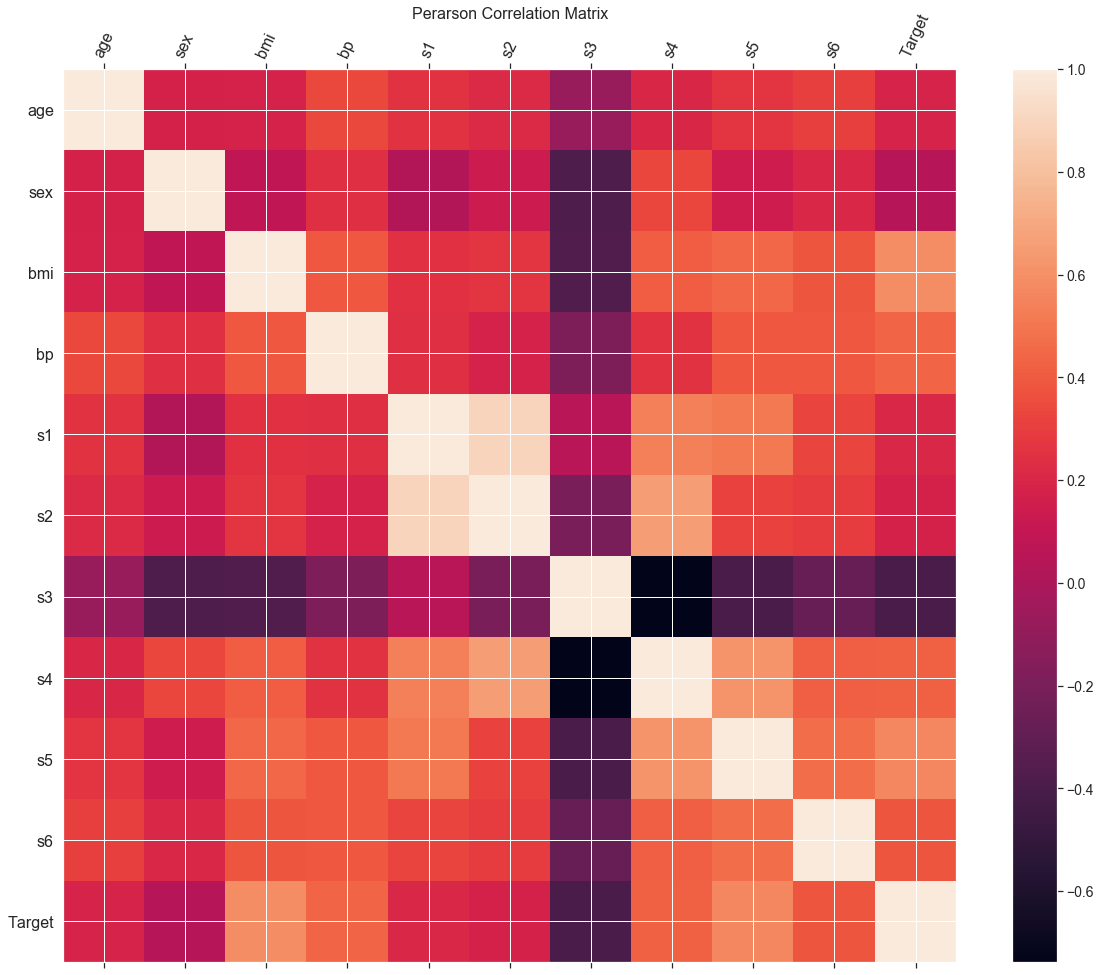

In [47]:
f = plt.figure(figsize=(20, 16))
plt.matshow(corrmat, fignum=f.number)
plt.xticks(range(df_dia.shape[1]), df_dia.columns, fontsize=16, rotation=65)
plt.yticks(range(df_dia.shape[1]), df_dia.columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Perarson Correlation Matrix', fontsize=16);

## 5) Outlier Detection

### i) Displaying Outliers using Z-Score

In [48]:
fea= ['age', 'sex', 'bmi', 'bp']
zscore = np.abs(stats.zscore(df_dia[fea]))
outlier_zscore=df_dia.iloc[np.where(zscore > 3)]
outlier_zscore

,bmi,bmi
256,0.161,0.161
367,0.171,0.171


### ii) Removing Outliers using Z-Score

In [49]:
df_dia.shape  # Shape Before Removing

(442, 11)

In [50]:
df_dia_z = df_dia[(zscore < 3).all(axis =1)]
df_dia_z.shape # Shape after removing

(440, 11)

### iii) Displaying Outliers using IQR

In [51]:
q1=df_col.quantile(0.25)
q3=df_col.quantile(0.75)
IQR=q3-q1
IQR

age    0.07525
sex    0.09600
bmi    0.06550
bp     0.07300
s1     0.06300
s2     0.05975
s3     0.06425
s4     0.07300
s5     0.06500
s6     0.06100
dtype: float64

In [52]:
outlier_IQR = ((df_col < (q1 - 1.5 * IQR))|(df_col > (q3 + 1.5 * IQR)))
outlier_IQR.sum() # Checking Outliers in every Column

age    0
sex    0
bmi    3
bp     0
s1     8
s2     7
s3     7
s4     4
s5     5
s6     9
dtype: int64

### iv) Removing Outliers by using IQR

In [53]:
df_col.shape

(442, 10)

In [54]:
df_col_IQR=df_col[~((df_col < (q1 - 1.5 * IQR))|(df_col > (q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
df_col_IQR.shape

(408, 10)

In [56]:
df_dia.to_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/ML2_Diabetes.csv",index=False)

# B) Crimes Data

In [57]:
missing_values = ["n/a", "na", "--","<",">","nan"]
df_crimes = pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/crimes_fti/crimes_fti.csv",encoding = 'unicode_escape',na_values = missing_values)

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1) Data Description

### i) Shape of Data

In [58]:
df_crimes.shape

(327820, 17)

### ii) Top 20 Rows

In [59]:
df_crimes.head(20)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,03/10/2018 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,30/08/2018 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,03/10/2018 19:20,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,03/10/2018 20:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,03/10/2018 20:49,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,02/10/2018 20:40,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,ABC,NaN,03/10/2018 20:16,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,03/10/2018 19:32,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,03/10/2018 19:27,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,03/10/2018 20:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


### iii) Data Types

In [60]:
df_crimes.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

### iv) MCT and Dispersion Properties

In [61]:
# Mean
col=["OFFENSE_CODE","YEAR","MONTH","HOUR","Lat","Long"]
for i in col:
    print("Mean of", i ,df_crimes[i].mean())

Mean of OFFENSE_CODE 2317.961170764444
Mean of YEAR 2016.5986761027393
Mean of MONTH 6.67221340979806
Mean of HOUR 13.114840461228724
Mean of Lat 42.212995057694066
Mean of Long -70.9060303052717


In [62]:
# Median
for i in col:
    print("Median of", i ,df_crimes[i].median())

Median of OFFENSE_CODE 2907.0
Median of YEAR 2017.0
Median of MONTH 7.0
Median of HOUR 14.0
Median of Lat 42.32555182
Median of Long -71.0774931


In [63]:
# Mode
for i in col:
    print("Mode of", i ,df_crimes[i].mode())

Mode of OFFENSE_CODE 0    3006
dtype: int64
Mode of YEAR 0    2017
dtype: int64
Mode of MONTH 0    8
dtype: int64
Mode of HOUR 0    17
dtype: int64
Mode of Lat 0    42.348624
dtype: float64
Mode of Long 0   -71.082776
dtype: float64


In [64]:
# Variance
for i in col:
    print("Variance of", i ,st.variance(df_crimes[i]))

Variance of OFFENSE_CODE 1404201.4731871632
Variance of YEAR 1.019645064589267
Variance of MONTH 10.588412178518787
Variance of HOUR 39.59825269784888
Variance of Lat nan
Variance of Long nan


In [65]:
df_crimes.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


### v) Check for null Values

In [66]:
df_crimes.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326765
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20632
Long                    20632
Location                    0
dtype: int64

## 2) Dealing with Data Quality Problems

### i) Unique Values Count of all Columns

In [67]:
df_crimes.nunique()

INCIDENT_NUMBER        290156
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            884
SHOOTING                    1
OCCURRED_ON_DATE       238675
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4684
Lat                     18239
Long                    18239
Location                18255
dtype: int64

In [68]:
df_crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,03/10/2018 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,30/08/2018 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,03/10/2018 19:20,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,03/10/2018 20:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,03/10/2018 20:49,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [69]:
count=0
for row in df_crimes['INCIDENT_NUMBER']:
    if((row == 'Others')):
        df_crimes.loc[count,'INCIDENT_NUMBER']=np.nan
    count+=1

In [70]:
count =0
for row in df_crimes['OFFENSE_CODE']:
    try:
        int(row)
        pass
    except ValueError:
        df_crimes.loc[count,'OFFENSE_CODE_GROUP'] = np.nan
    count +=1

In [71]:
count =0
for row in df_crimes['OFFENSE_CODE_GROUP']:
    try:
        int(row)
        df_crimes.loc[count,'OFFENSE_CODE_GROUP'] = np.nan
    except ValueError:
        pass
    count +=1

In [72]:
count=0
for row in df_crimes['OFFENSE_DESCRIPTION']:
    if((row == 'Other')):
        df_crimes.loc[count,'OFFENSE_DESCRIPTION']=np.nan
    count+=1

In [73]:
count=0
for row in df_crimes['DISTRICT']:
    if((row == 'Others')| (row=="Other")):
        df_crimes.loc[count,'DISTRICT']=np.nan
    count+=1

In [74]:
count=0
for row in df_crimes['STREET']:
    if((row == 'Others')):
        df_crimes.loc[count,'STREET']=np.nan
    count+=1

In [75]:
count=0
for row in df_crimes['REPORTING_AREA']:
    if any(c.isalpha() for c in str(row)):
        df_crimes.loc[count,'REPORTING_AREA']=np.nan
    count+=1

In [76]:
df_crimes["OCCURRED_ON_DATE"]=pd.to_datetime(df_crimes["OCCURRED_ON_DATE"])

In [77]:
count=0
for row in df_crimes['UCR_PART']:
    if((row == 'Other')):
        df_crimes.loc[count,'UCR_PART']=np.nan
    count+=1

In [78]:
pd.to_numeric(df_crimes['YEAR'], errors='coerce').fillna(np.nan,inplace=True)

In [79]:
pd.to_numeric(df_crimes['MONTH'], errors='coerce').fillna(np.nan,inplace=True)

In [80]:
pd.to_numeric(df_crimes['HOUR'], errors='coerce').fillna(np.nan,inplace=True)

In [81]:
pd.to_numeric(df_crimes['Lat'], errors='coerce').fillna(np.nan,inplace=True)

In [82]:
pd.to_numeric(df_crimes['Long'], errors='coerce').fillna(np.nan,inplace=True)

In [83]:
df_crimes.drop("SHOOTING", axis=1, inplace=True)

In [84]:
df_crimes.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1774
REPORTING_AREA             4
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                1378
STREET                 10977
Lat                    20632
Long                   20632
Location                   0
dtype: int64

In [85]:
df_crimes.dropna(inplace=True)

In [86]:
df_crimes.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [87]:
df_crimes.shape

(303464, 16)

## 3) Feature Encoding & Discretization

### i) Label Encoding

In [88]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [89]:
df_crimes.OFFENSE_CODE_GROUP=lbe.fit_transform(df_crimes.OFFENSE_CODE_GROUP)

In [90]:
df_crimes.DAY_OF_WEEK=lbe.fit_transform(df_crimes.DAY_OF_WEEK)

### ii) One Hot Encoding

In [91]:
dfdummies=pd.get_dummies(df_crimes["UCR_PART"],prefix="UCR")
df_crimes=pd.concat([df_crimes,dfdummies],axis=1)
del df_crimes["UCR_PART"]
df_crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_Part One,UCR_Part Three,UCR_Part Two
0,I182080058,2403,11,DISTURBING THE PEACE,E18,495,2018-03-10 20:13:00,2018,10,6,20,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",0,0,1
1,I182080053,3201,44,PROPERTY - LOST,D14,795,2018-08-30 20:00:00,2018,8,4,20,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",0,1,0
2,I182080052,2647,38,THREATS TO DO BODILY HARM,B2,329,2018-03-10 19:20:00,2018,10,6,19,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",0,0,1
3,I182080051,413,0,ASSAULT - AGGRAVATED - BATTERY,A1,92,2018-03-10 20:00:00,2018,10,6,20,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",1,0,0
4,I182080050,3122,1,AIRCRAFT INCIDENTS,A7,36,2018-03-10 20:49:00,2018,10,6,20,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",0,1,0


### iii) Discretization of Hour Column

In [92]:
df_crimes['HOUR'] = np.where((df_crimes["HOUR"]>= 0) & (df_crimes["HOUR"]<= 7),'Early Morning',
                    np.where((df_crimes["HOUR"]>= 8) & (df_crimes["HOUR"]<= 11),'Morning',
                    np.where((df_crimes["HOUR"]>= 12) & (df_crimes["HOUR"]<= 15),'Afternoon',
                    np.where((df_crimes["HOUR"]>= 16) & (df_crimes["HOUR"]<= 18),'Evening','Night'))))

In [93]:
df_crimes["HOUR"].unique()

array(['Night', 'Evening', 'Morning', 'Early Morning', 'Afternoon'],
      dtype=object)

In [94]:
df_crimes.to_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/ML2_Crimes.csv",index=False)

# 4) Creating a Statistical Map of the area so we could Analyse where Crimes occur most often

In [95]:
df_cri=df_crimes.iloc[0:100,:]   #Creating a small dataset for speed purposes
df_cri.shape

(100, 18)

In [96]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: E:\Anaconda

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.0                |           py37_1         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                        4.8.0-py37_0 --> 4.8.0-py37_1




conda-4.8.0          | 3.0 MB    |            |   0% 
conda-4.8.0          | 3.0 MB    |            |   1% 
conda-4.8.0          | 3.0 MB    | #8         |  19% 
conda-4.8.0          | 3.0 MB    | ##4        |  24% 
conda-4.8.0          | 3.0 MB    | ###5       |  35% 
conda-4.8.0          | 3.0 MB    | #####      |  51% 
conda-4.8.0          | 3.0 MB    | ######8    |  68% 
con

In [97]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [98]:
latitude = np.mean(list(df_cri.Lat))
longitude = np.mean(list(df_cri.Long))
# create map and display it
usa_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [100]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_cri.Lat, df_cri.Long):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='Yellow',
            fill=True,
            fill_color='Red',
            fill_opacity=0.8
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_cri.Lat)
longitudes = list(df_cri.Long)
labels = list(df_cri.OFFENSE_DESCRIPTION)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(usa_map)

# add incidents to map
usa_map.add_child(incidents)